# 1 Basic Linear Correlation

                 room  Occupancy  Sound Level
room         1.000000   0.189192     0.507432
Occupancy    0.189192   1.000000     0.117652
Sound Level  0.507432   0.117652     1.000000


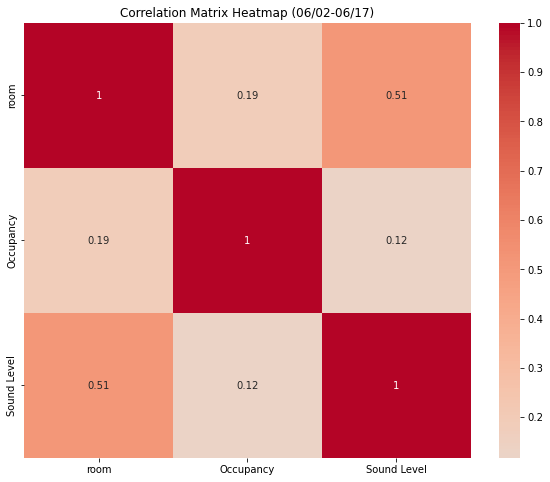

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("merged_data_filled_qian.csv", header=0, parse_dates=[0], index_col=0)

# change name of columns
df = df.rename(columns={"count_1s": "Occupancy", "Value": "Sound Level"})

# calculate correlation for each variable
correlation_matrix = df.corr()

print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap (06/02-06/17)')
#plt.savefig('Pearson_06.png')
plt.show()



                 room  Occupancy  Sound Level
room         1.000000   0.156260     0.406831
Occupancy    0.156260   1.000000     0.103349
Sound Level  0.406831   0.103349     1.000000


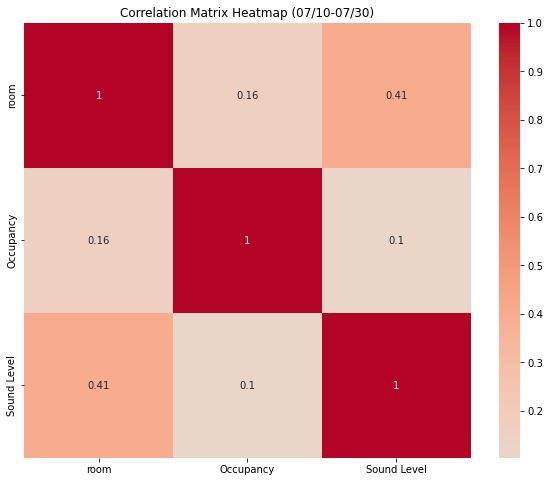

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read second period data
df = pd.read_csv("merged_data_filled_zhong.csv", header=0, parse_dates=[0], index_col=0)


df = df.rename(columns={"count_1s": "Occupancy", "Value": "Sound Level"})


correlation_matrix = df.corr()

print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap (07/10-07/30)')
#plt.savefig('Pearson_07.png')
plt.show()

# 2 Time Series

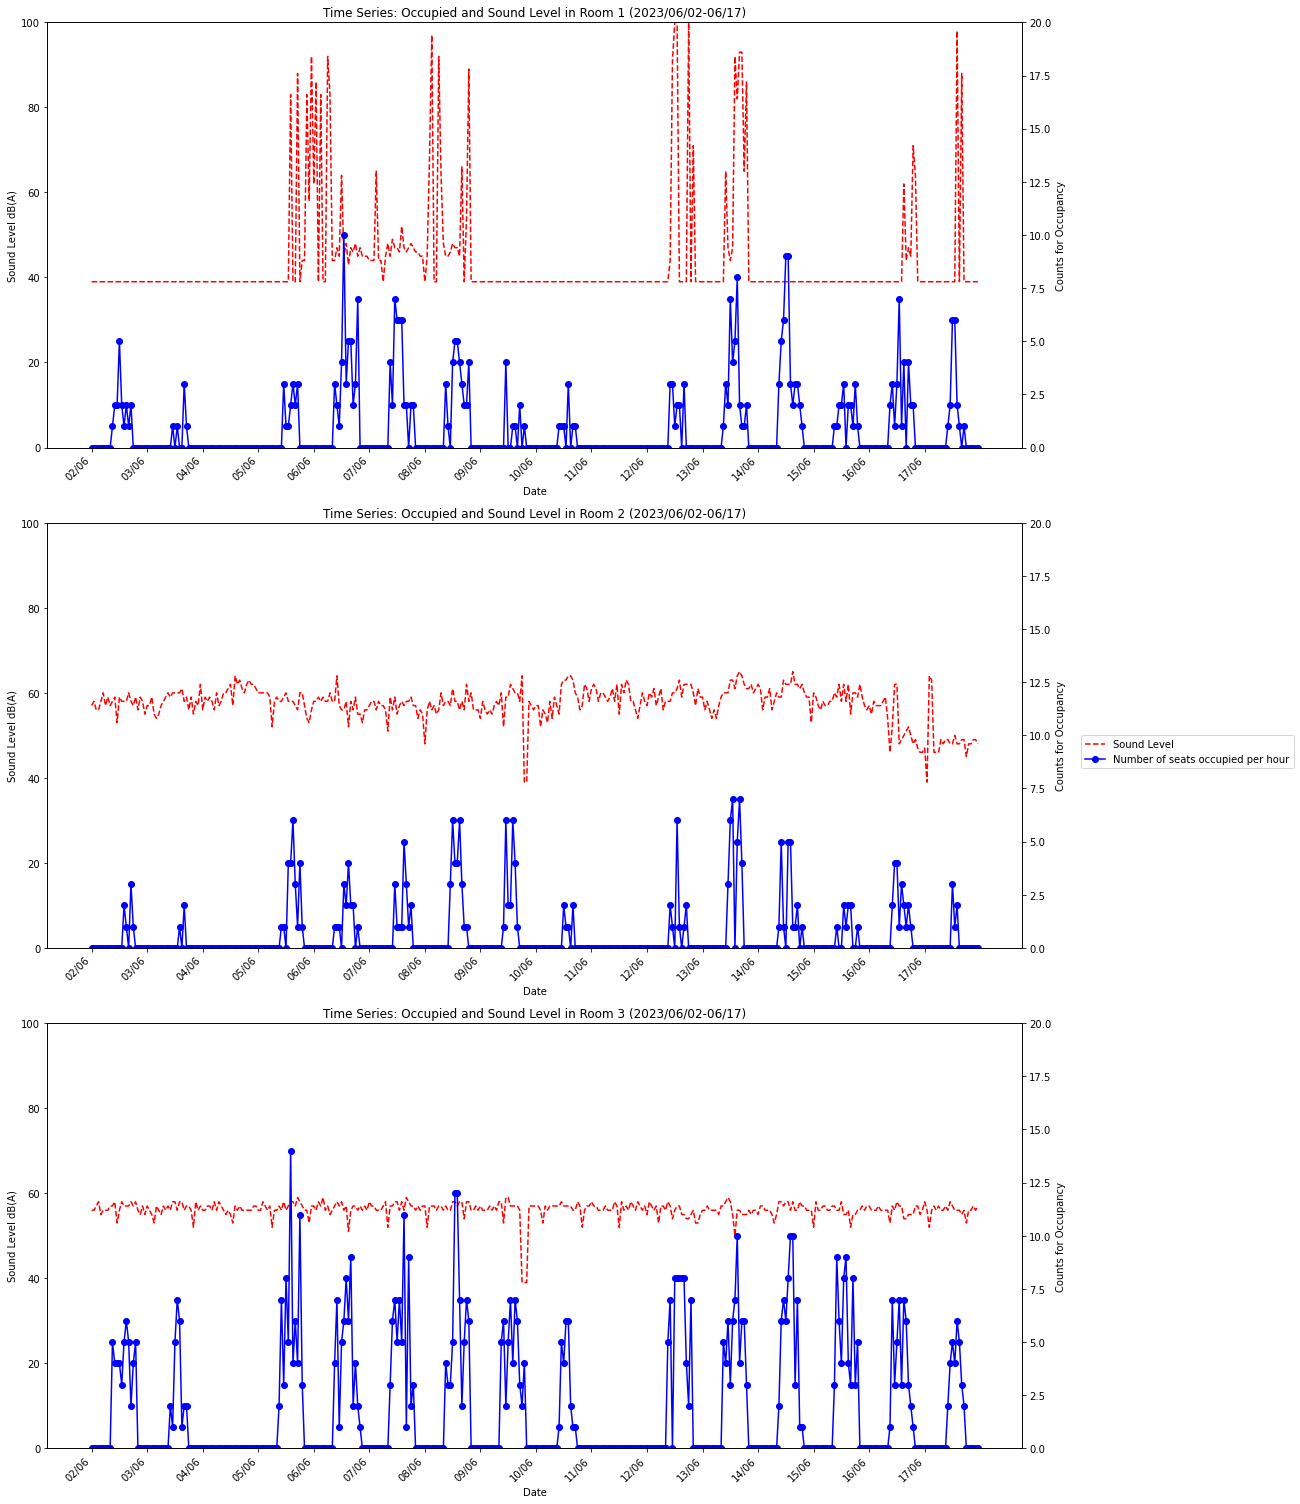

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("merged_data_filled_qian.csv")

# Convert the 'date' column to datetime format and specify the correct format
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

# Sort by the 'date' column to ensure data is in chronological order
data = data.sort_values(by='date')

# Define the order of rooms
rooms = [1, 2, 3]

# Create the main figure
fig = plt.figure(figsize=(15, 7 * len(rooms)))

# Create a subplot for each room
for idx, room in enumerate(rooms, 1):
    room_data = data[data['room'] == room]
    
    # Calculate x-axis ticks
    x_ticks = room_data['date'][::24]  # Display every 24 time points
    x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]

    # Create a subplot
    ax = fig.add_subplot(len(rooms), 1, idx)

    # Set left y-axis
    ax.set_ylabel("Sound Level dB(A)")
    ax.set_ylim(0, 100)
    ax.plot(room_data['date'], room_data['Value'], label='Sound Level', color='red', linestyle='--')

    # Set right y-axis
    ax2 = ax.twinx()
    ax2.plot(room_data['date'], room_data['count_1s'], label='Number of seats occupied per hour', color='blue', marker='o')
    ax2.set_ylabel("Counts for Occupancy")
    ax2.set_ylim(0, 20)

    # Set subplot title and axis labels
    ax.set_title(f"Time Series: Occupied and Sound Level in Room {room} (2023/06/02-06/17)")
    ax.set_xlabel("Date")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.8)

# Create legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = fig.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout()

# Save the image
#plt.savefig('Time Series: Occupied and Sound Level in Room_qian.png', bbox_extra_artists=(legend,), bbox_inches='tight')

# Display the plot
plt.show()


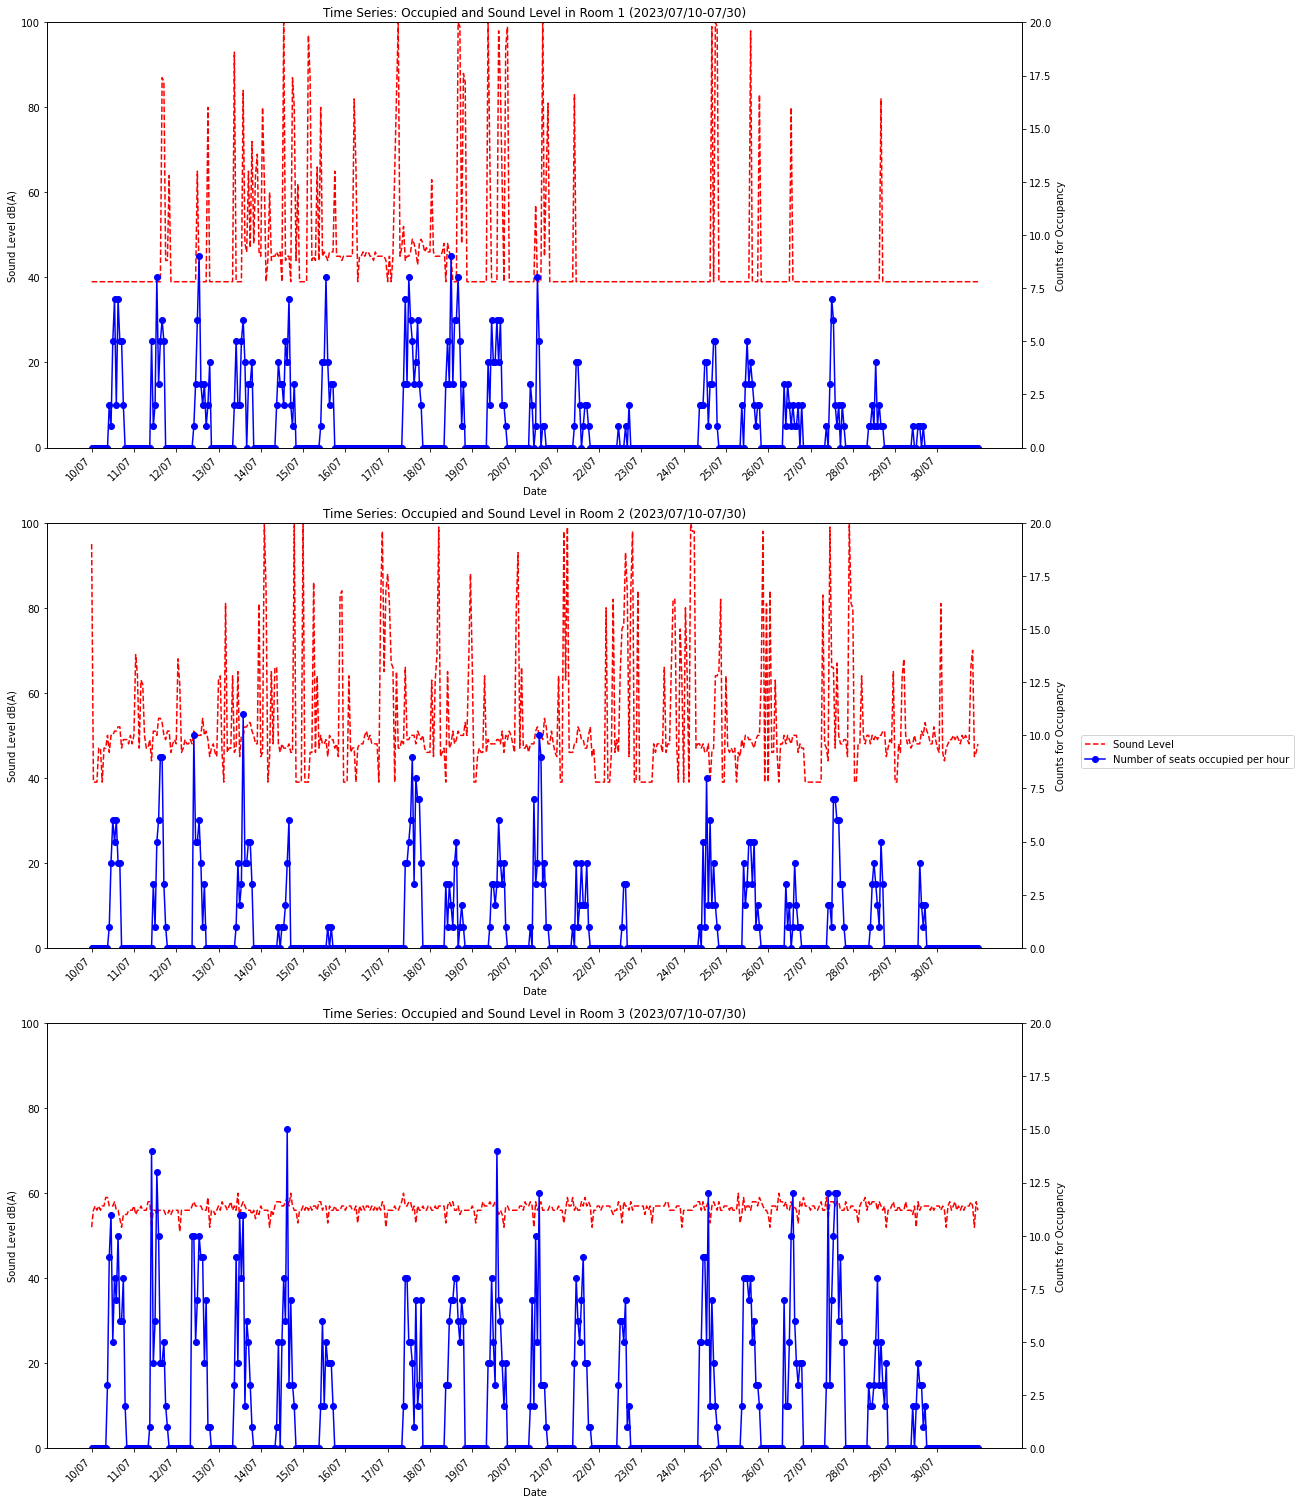

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("merged_data_filled_zhong.csv")

# Convert the 'date' column to datetime format and specify the correct format
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

# Sort by the 'date' column to ensure data is in chronological order
data = data.sort_values(by='date')

# Define the order of rooms to display
rooms = [1, 2, 3]

# Create the main figure
fig = plt.figure(figsize=(15, 7 * len(rooms)))

# Create a subplot for each room
for idx, room in enumerate(rooms, 1):
    room_data = data[data['room'] == room]
    
    # Calculate x-axis ticks
    x_ticks = room_data['date'][::24]  # Display every 24 time points
    x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]

    # Create a subplot
    ax = fig.add_subplot(len(rooms), 1, idx)

    # Set left y-axis
    ax.set_ylabel("Sound Level dB(A)")
    ax.set_ylim(0, 100)
    ax.plot(room_data['date'], room_data['Value'], label='Sound Level', color='red', linestyle='--')

    # Set right y-axis
    ax2 = ax.twinx()
    ax2.plot(room_data['date'], room_data['count_1s'], label='Number of seats occupied per hour', color='blue', marker='o')
    ax2.set_ylabel("Counts for Occupancy")
    ax2.set_ylim(0, 20)

    # Set subplot title and axis labels
    ax.set_title(f"Time Series: Occupied and Sound Level in Room {room} (2023/07/10-07/30)")
    ax.set_xlabel("Date")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5)

# Create legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = fig.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout()

# Save the image
#plt.savefig('Time Series: Occupied and Sound Level in Room_hou.png', bbox_extra_artists=(legend,), bbox_inches='tight')

# Display the plot
plt.show()


# 2.1 Seasonal Decomposition

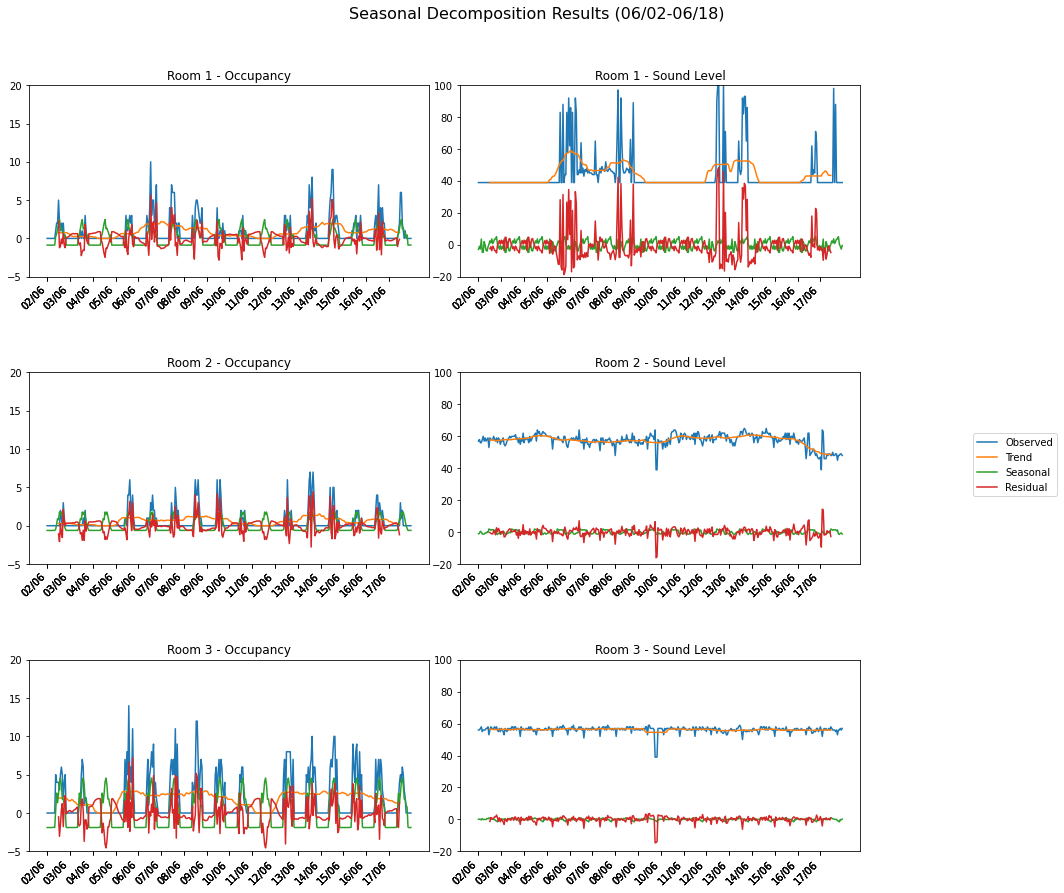

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the data
data = pd.read_csv('merged_data_filled_qian.csv')
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')  # Convert to the specified date format

# Create a large figure containing 3x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
x_ticks = data['date'][::24]  # Display every 24 time points
x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]  # Show only the date part

# Iterate through all rooms
for room_idx, room in enumerate([1, 2, 3]):
    room_data = data[data['room'] == room].set_index('date')  # Filter data for the room and set date as index

    # Decompose count_1s and Value separately and plot
    for col_idx, column in enumerate(['count_1s', 'Value']):
        seasonal_data = seasonal_decompose(room_data[column], period=24)

        # Plot each component of the seasonal decomposition
        ax = axes[room_idx, col_idx]
        label = "Occupancy" if column == "count_1s" else "Sound Level"
        ax.set_title(f'Room {room} - {label}')
        ax.plot(seasonal_data.observed)
        ax.plot(seasonal_data.trend)
        ax.plot(seasonal_data.seasonal)
        ax.plot(seasonal_data.resid)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')  # Set x-axis ticks and labels

        # Set y-axis range based on the column
        if column == "count_1s":
            ax.set_ylim(-5, 20)
        else:
            ax.set_ylim(-20, 100)

# Add a legend at the center-right position of all plots
legend = fig.legend(['Observed', 'Trend', 'Seasonal', 'Residual'], loc='center left', bbox_to_anchor=(0.9, 0.5))

fig.suptitle('Seasonal Decomposition Results (06/02-06/18)', fontsize=16, y=1.03)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, right=0.8)

#plt.savefig('Season_qian.png', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()


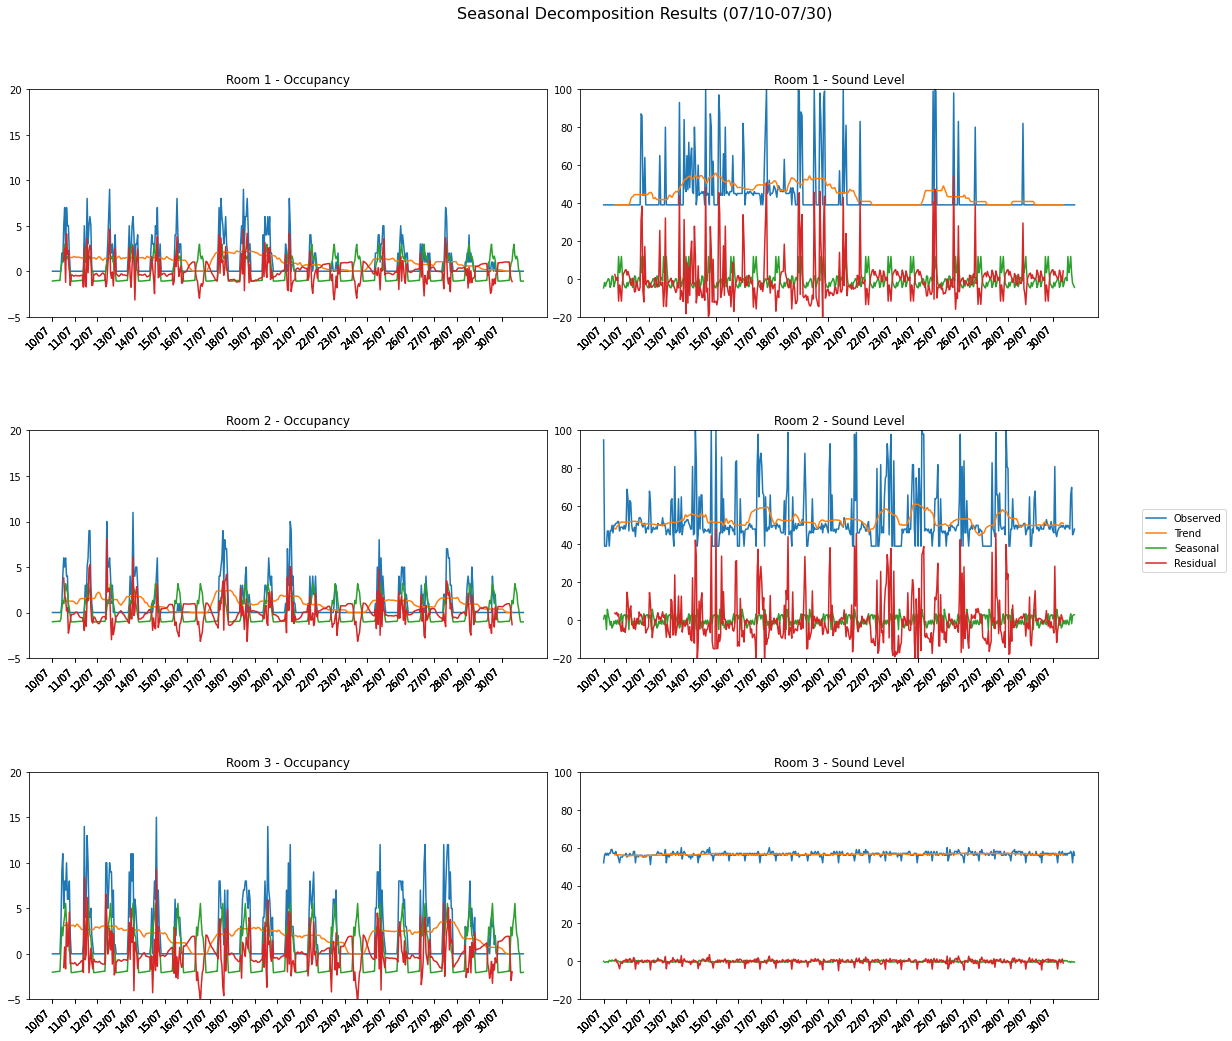

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the data
data = pd.read_csv('merged_data_filled_zhong.csv')
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')  # Convert according to your date format

# Create a large figure containing 3x2 subplots
# Adjust figsize to (18, 14)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
x_ticks = data['date'][::24]  # Display every 24 time points
x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]  # Show complete date part

# Iterate through all rooms
for room_idx, room in enumerate([1, 2, 3]):
    room_data = data[data['room'] == room].set_index('date')  # Filter data for the room and set date as index

    # Decompose count_1s and Value separately and plot
    for col_idx, column in enumerate(['count_1s', 'Value']):
        seasonal_data = seasonal_decompose(room_data[column], period=24)

        # Plot each component of the seasonal decomposition
        ax = axes[room_idx, col_idx]
        label = "Occupancy" if column == "count_1s" else "Sound Level"
        ax.set_title(f'Room {room} - {label}')
        ax.plot(seasonal_data.observed)
        ax.plot(seasonal_data.trend)
        ax.plot(seasonal_data.seasonal)
        ax.plot(seasonal_data.resid)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')  # Set x-axis ticks and labels

        # Set y-axis range based on the column
        if column == "count_1s":
            ax.set_ylim(-5, 20)
        else:
            ax.set_ylim(-20, 100)

# Add a legend at the center-right position of all plots, consistent with the bbox_to_anchor from the second provided code block
legend = fig.legend(['Observed', 'Trend', 'Seasonal', 'Residual'], loc='center left', bbox_to_anchor=(0.88, 0.5))

fig.suptitle('Seasonal Decomposition Results (07/10-07/30)', fontsize=16, y=1.03)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, right=0.85)  # Adjust right boundary to create more space

#plt.savefig('Season_hou.png', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()


In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# 2.2 White Noise

In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Read the data
df = pd.read_csv('merged_data_filled_zhong.csv')

# Columns to test
columns_to_test = ['count_1s', 'Value']

for column in columns_to_test:
    # Ensure the column is in the DataFrame
    if column in df.columns:
        result = adfuller(df[column], autolag='AIC', regression='ct')
        
        print(f'Results for {column}:')
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Used lags: %i' % result[2])
        print('Number of observations used: %i' % result[3])
        print('Critical values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        print()
    else:
        print(f"Column {column} not found in the DataFrame.")


Results for count_1s:
ADF Statistic: -3.799009
p-value: 0.016611
Used lags: 23
Number of observations used: 1488
Critical values:
	1%: -3.965
	5%: -3.413
	10%: -3.129

Results for Value:
ADF Statistic: -12.791578
p-value: 0.000000
Used lags: 4
Number of observations used: 1507
Critical values:
	1%: -3.965
	5%: -3.413
	10%: -3.129



# 3 Non-linear

# 4 Forecasting

# 4.1 Cross-Correlation

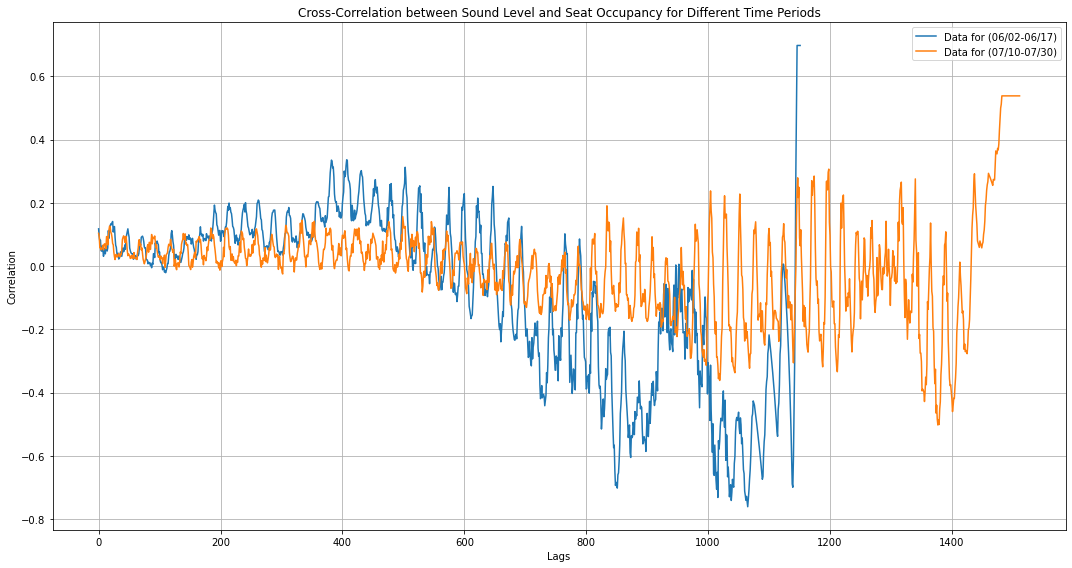

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# Read two data files
data_qian = pd.read_csv("merged_data_filled_qian.csv", parse_dates=['date'])
data_zhong = pd.read_csv("merged_data_filled_zhong.csv", parse_dates=['date'])

# Set the date as index
data_qian.set_index('date', inplace=True)
data_zhong.set_index('date', inplace=True)

plt.figure(figsize=(15, 8))

# Calculate cross-correlation for the first data file and plot
lag_correlation_qian = ccf(data_qian['count_1s'], data_qian['Value'])
plt.plot(lag_correlation_qian, label="Data for (06/02-06/17)")

# Calculate cross-correlation for the second data file and plot
lag_correlation_zhong = ccf(data_zhong['count_1s'], data_zhong['Value'])
plt.plot(lag_correlation_zhong, label="Data for (07/10-07/30)")

# Add legend, title, labels, and other information
plt.legend()
plt.title("Cross-Correlation between Sound Level and Seat Occupancy for Different Time Periods")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
#plt.savefig('Cross-Correlation between Sound Level and Seat Occupancy for Different Time Period.png')
plt.show()


In [10]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 4.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 7.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 7.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 6.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [11]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


# 4.2 Building Model

In [12]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read data
data_qian = pd.read_csv("merged_data_filled_qian.csv")
data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

def process_data(data, look_back=1):
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']

    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    target = target.values[look_back-1:]
    
    return features, target

look_back = 24
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

k_folds = 5  
kf = KFold(n_splits=k_folds, shuffle=False)
fold_indices = kf.split(scaled_features)

# Create an empty DataFrame to store cross-validation results
results_df = pd.DataFrame(columns=['Fold', 'MSE', 'RMSE', 'MAE', 'R2'])

for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    # Create LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(LSTM(units=50))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    model_lstm.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    predicted_values_lstm = model_lstm.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, predicted_values_lstm)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_lstm)
    r2_fold = r2_score(y_val_fold, predicted_values_lstm)

    # Add results of this fold to the DataFrame
    results_df.loc[fold] = [fold + 1, mse_fold, rmse_fold, mae_fold, r2_fold]
    print(f"Fold {fold + 1} results added to DataFrame.")

# Save the DataFrame to a CSV file
#results_df.to_csv('cross_validation_results.csv', index=False)

print("Cross-validation results saved to 'cross_validation_results.csv'.")


2023-08-23 23:49:00.655411: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 23:49:00.705744: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 23:49:00.707789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 23:49:01.818228: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100
66/66 [==============================] - 3s 14ms/step - loss: 6.2245
Epoch 2/100
66/66 [==============================] - 1s 14ms/step - loss: 5.0757
Epoch 3/100
66/66 [==============================] - 1s 14ms/step - loss: 3.3436
Epoch 4/100
66/66 [==============================] - 1s 14ms/step - loss: 3.3106
Epoch 5/100
66/66 [==============================] - 1s 14ms/step - loss: 3.0505
Epoch 6/100
66/66 [==============================] - 1s 14ms/step - loss: 3.0884
Epoch 7/100
66/66 [==============================] - 1s 15ms/step - loss: 3.1337
Epoch 8/100
66/66 [==============================] - 1s 14ms/step - loss: 3.1614
Epoch 9/100
66/66 [==============================] - 1s 14ms/step - loss: 3.0087
Epoch 10/100
66/66 [==============================] - 1s 14ms/step - loss: 3.0092
Epoch 11/100
66/66 [==============================] - 1s 13ms/step - loss: 3.0496
Epoch 12/100
66/66 [==============================] - 1s 14ms/step - loss: 2.9631
Epoch 13/100
66/66 [=====

In [13]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def process_data(data, look_back=1):
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']

    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    target = target.values[look_back-1:]
    
    return features, target

# Assuming you've already read the CSV files into data_qian and data_zhong
# data_qian = pd.read_csv("merged_data_filled_qian.csv")
# data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

look_back = 24
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=False)
fold_indices = kf.split(scaled_features)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Fold', 'MSE', 'RMSE', 'MAE', 'R2'])

for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    model_gru = Sequential()
    model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_gru.add(Dropout(0.2))
    model_gru.add(GRU(units=50))
    model_gru.add(Dropout(0.2))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    model_gru.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    predicted_values_gru = model_gru.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, predicted_values_gru)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_gru)
    r2_fold = r2_score(y_val_fold, predicted_values_gru)

    # Store the results into the DataFrame
    results_df.loc[fold] = [fold + 1, mse_fold, rmse_fold, mae_fold, r2_fold]
    print(f"Fold {fold + 1} results added to DataFrame.")

# Save the results DataFrame to a CSV file
#results_df.to_csv('cross_validation_results_gru.csv', index=False)
print("Cross-validation results saved to 'cross_validation_results_gru.csv'.")

Epoch 1/100
66/66 [==============================] - 4s 14ms/step - loss: 6.1613
Epoch 2/100
66/66 [==============================] - 1s 13ms/step - loss: 5.0485
Epoch 3/100
66/66 [==============================] - 1s 13ms/step - loss: 3.3619
Epoch 4/100
66/66 [==============================] - 1s 16ms/step - loss: 3.1835
Epoch 5/100
66/66 [==============================] - 1s 16ms/step - loss: 3.1210
Epoch 6/100
66/66 [==============================] - 1s 14ms/step - loss: 3.1501
Epoch 7/100
66/66 [==============================] - 1s 13ms/step - loss: 3.1449
Epoch 8/100
66/66 [==============================] - 1s 13ms/step - loss: 3.1259
Epoch 9/100
66/66 [==============================] - 1s 15ms/step - loss: 3.1191
Epoch 10/100
66/66 [==============================] - 1s 16ms/step - loss: 3.1042
Epoch 11/100
66/66 [==============================] - 1s 15ms/step - loss: 3.0577
Epoch 12/100
66/66 [==============================] - 1s 16ms/step - loss: 3.0457
Epoch 13/100
66/66 [=====

## Find best hyperparameter

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Other code and data preprocessing part remains the same.

# Define the hyperparameter combinations to try
look_back_values = [24]
units_values = [50, 100, 150]
dropout_values = [0.2, 0.3, 0.4]

# Lists to store the results
results = []

# Perform hyperparameter tuning
for look_back in look_back_values:
    for units in units_values:
        for dropout in dropout_values:
            mse_scores = []
            kf = KFold(n_splits=5, shuffle=False)
            for train_idx, val_idx in kf.split(scaled_features):
                X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
                y_train_fold, y_val_fold = target[train_idx], target[val_idx]
                
                model = Sequential()
                model.add(GRU(units=units, return_sequences=True, input_shape=(look_back, n_features)))
                model.add(Dropout(dropout))
                model.add(GRU(units=units))
                model.add(Dropout(dropout))
                model.add(Dense(units=1))
                model.compile(optimizer='adam', loss='mean_squared_error')
                
                model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)
                
                predicted_values = model.predict(X_val_fold)
                mse_fold = mean_squared_error(y_val_fold, predicted_values)
                mse_scores.append(mse_fold)
            
            mean_mse = np.mean(mse_scores)
            std_mse = np.std(mse_scores)
            results.append({'look_back': look_back, 'units': units, 'dropout': dropout, 'mean_mse': mean_mse, 'std_mse': std_mse})

# Find the best hyperparameters based on mean MSE
best_result = min(results, key=lambda x: x['mean_mse'])

print(f"Best Hyperparameters: {best_result}")


## Train GRU Model with New hyperparameter

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据
data_qian = pd.read_csv("merged_data_filled_qian.csv")
data_zhong = pd.read_csv("merged_data_filled_zhong.csv")
data_hou = pd.read_csv("merged_data_filled_hou.csv")

def process_data(data, look_back=1):
    # Data preprocessing code (same as before)
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']
    
    # Modify features to include a window of previous time steps
    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    
    target = target.values[look_back-1:]  # Adjust target to align with look_back

    return features, target

# Set look_back
look_back = 24

# Data preprocessing
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

# Merge data
features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

# Reshape the features array to 2D before applying MinMaxScaler
n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape the features back to 3D
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

# Define K-fold cross-validation folds
k_folds = 5  # Assume using 5-fold cross-validation

# Create KFold object and get indices
kf = KFold(n_splits=k_folds, shuffle=False)  # shuffle=False, as your data is time-ordered
fold_indices = kf.split(scaled_features)

# Lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform K-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    # Create GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_gru.add(Dropout(0.4))
    model_gru.add(GRU(units=50))
    model_gru.add(Dropout(0.4))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model_gru.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)
     # Save model weights after training
 

    # Make predictions on the validation set
    predicted_values_gru = model_gru.predict(X_val_fold)

    # Calculate evaluation metrics (MSE, RMSE, MAE, R2, etc.)
    mse_fold = mean_squared_error(y_val_fold, predicted_values_gru)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_gru)
    r2_fold = r2_score(y_val_fold, predicted_values_gru)

    print(f'Fold {fold+1} Metrics:')
    print(f'Mean Squared Error (MSE): {mse_fold}')
    print(f'Root Mean Squared Error (RMSE): {rmse_fold}')
    print(f'Mean Absolute Error (MAE): {mae_fold}')
    print(f'R-squared (R2): {r2_fold}')

    # Store evaluation metrics for each fold
    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)
# ... [Your existing code]

# After the K-fold cross-validation loop:
model_gru.save_weights("model_weights_last_fold.h5")



# Calculate the average and standard deviation of cross-validation results
print(f'Cross-validation Metrics:')
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation MSE: {np.std(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')
print(f'Standard Deviation RMSE: {np.std(rmse_scores)}')
print(f'Mean MAE: {np.mean(mae_scores)}')
print(f'Standard Deviation MAE: {np.std(mae_scores)}')
print(f'Mean R-squared (R2): {np.mean(r2_scores)}')
print(f'Standard Deviation R-squared (R2): {np.std(r2_scores)}')

## Predict 2023 July Data and Compare with Real Data

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Read data
data_qian = pd.read_csv("merged_data_filled_qian.csv")
data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

def process_data(data, look_back=1):
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']

    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    target = target.values[look_back-1:]

    return features, target

def calculate_accuracy(y_true, y_pred, threshold=0.5):
    return np.mean(np.abs(y_true - y_pred) <= threshold)

look_back = 24
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)
features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))
n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=False)
fold_indices = kf.split(scaled_features)

# Accumulate results for each fold
results = {
    "Fold": [],
    "MSE": [],
    "RMSE": [],
    "MAE": [],
    "R2": [],
    "Accuracy within Threshold": []
}

for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    model_gru = Sequential()
    model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_gru.add(Dropout(0.4))
    model_gru.add(GRU(units=50))
    model_gru.add(Dropout(0.4))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')
    model_gru.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    predicted_values_gru = model_gru.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, predicted_values_gru)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_gru)
    r2_fold = r2_score(y_val_fold, predicted_values_gru)
    accuracy_fold = calculate_accuracy(y_val_fold, predicted_values_gru, threshold=0.5)

    # Add to the results dictionary
    results["Fold"].append(fold+1)
    results["MSE"].append(mse_fold)
    results["RMSE"].append(rmse_fold)
    results["MAE"].append(mae_fold)
    results["R2"].append(r2_fold)
    results["Accuracy within Threshold"].append(accuracy_fold)

# Display results table using pandas
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Save the results table to a CSV file
results_df.to_csv('results_table_819.csv', index=False)

# Plot a bar chart comparing true and predicted occupancy counts
fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(len(y_val_fold))
bar_width = 0.35
rects1 = ax.bar(index, y_val_fold, bar_width, label='True Values')
rects2 = ax.bar(index + bar_width, predicted_values_gru.flatten(), bar_width, label='Predicted Values')

ax.set_xlabel('Time Scale')
ax.set_ylabel('Counts of Occupancy')
ax.set_title('Comparison between True and Predicted Counts of Occupancy')
ax.legend()
plt.tight_layout()
plt.savefig("true_vs_predicted_occupancy_comparison.png")
plt.show()


In [ ]:
# Read data
data_hou = pd.read_csv("merged_data_filled_hou.csv")

# We don't need the 'count_1s' column as it was filled with zeros
data_hou = data_hou.drop(columns=['count_1s'])

# Preprocess the new data
features_hou, _ = process_data(data_hou, look_back=look_back_prediction, return_target=False)  # Note to set return_target=False

# Reshape features to 2D before scaling
n_samples_hou, _, n_features_hou = features_hou.shape
features_hou_reshaped = features_hou.reshape((n_samples_hou, look_back_prediction * n_features_hou))

# Scale the new data using the previously trained scaler
scaled_features_hou = scaler.transform(features_hou_reshaped)

# Reshape the features back to 3D
scaled_features_hou = scaled_features_hou.reshape((n_samples_hou, look_back_prediction, n_features_hou))

# Use the previously trained model to predict 'count_1s'
predicted_count_1s = model_gru.predict(scaled_features_hou)
print(predicted_count_1s)

# If you want to add the predicted 'count_1s' values back to the original data, you can do it like this:
#data_hou['predicted_count_1s'] = np.concatenate([np.zeros(look_back_prediction-1), predicted_count_1s.flatten()])


In [ ]:
# Assuming you have predicted_values_gru from the previous code
# Convert predicted_values_gru to a pandas DataFrame
predicted_count_1s = pd.DataFrame(predicted_count_1s, columns=['pre_count_1s'])



# Concatenate the two DataFrames side by side
result_pre = pd.concat([predicted_count_1s], axis=1)

# Save the result DataFrame to a CSV file
result_pre.to_csv("predicted_count_1s_0813.csv", index=False)

## Predict 2023 Missing Data and Compare with 2022

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
predicted_df = pd.read_csv("predicted_count_1s_0813.csv")
lastyear_df = pd.read_csv("grouped_hourly_counts_lastyear.csv")

# Make sure both DataFrames have the same length. If not, you may need to trim or merge them.
if len(predicted_df) != len(lastyear_df):
    print("Warning: DataFrames have different lengths!")
    min_length = min(len(predicted_df), len(lastyear_df))
    predicted_df = predicted_df.head(min_length)
    lastyear_df = lastyear_df.head(min_length)

# Plotting
plt.figure(figsize=(15,7))
plt.plot(predicted_df['pre_count_1s'], label='Predicted Occupancy of 2023', color='blue')
plt.plot(lastyear_df['count_1s'], label='Actual Occupancy of 2022', color='red', linestyle='--')
plt.legend(fontsize='large')
plt.title('Comparison of Predicted Occupancy of Year 2023 and Actual Occupancy of Year 2022')
plt.xlabel('Time Scale')
plt.ylabel('Counts of Occupancy')

plt.tight_layout()
plt.savefig("output_Comparison of Predicted Occupancy of 2023 and Actual Occupancy of 2022.png")

plt.show()
